In [21]:
#import modules

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
#Loading the dataset

# Code starts here
train = pd.read_csv("C:/Users/hp/Python Projects/Projects/Project_Ensemble_Techniques_Mars_Crater_Classification/train.csv")
train.head(10)

,Id,Unnamed: 0,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr1080,attr1081,attr1082,attr1083,attr1084,attr1085,attr1086,attr1087,attr1088,attr1089
0,2216,2216,-4.374765,13.819856,14.656331,-9.728919,-19.334897,0.344455,11.105720,21.977302,...,89.083581,86.194838,93.162055,100.883355,123.558503,112.831384,100.583377,102.194939,120.306692,0
1,2673,2673,-13.796261,-4.647589,21.676617,-0.122074,11.228644,-8.806895,-9.161190,18.025709,...,100.750899,83.373142,76.902208,72.182997,102.843819,93.118477,80.338570,80.196648,93.995657,0
2,5603,5603,-2.115400,-3.332400,-6.640000,-13.825000,4.123200,27.365000,6.700200,3.783000,...,52.917000,34.799000,42.562000,51.161000,77.139000,73.367000,50.733000,39.949000,60.731000,0
3,6401,6401,-25.531000,66.699000,-13.025000,-31.198000,12.016000,19.365000,5.045100,20.418000,...,49.488000,71.633000,66.757000,69.213000,97.606000,81.416000,53.808000,41.489000,71.825000,0
4,6043,6043,18.993000,-5.620000,-9.964900,3.307200,0.999760,-10.920000,-11.392000,3.918500,...,84.508000,89.976000,61.169000,33.132000,58.043000,54.522000,80.941000,53.000000,80.615000,1
5,4005,4005,2.521221,-12.778210,-3.288349,2.072679,-5.787825,8.485524,45.358527,-41.195374,...,84.234111,100.756890,96.178684,111.481147,96.562252,108.789586,100.388893,102.419747,105.078946,0
6,4449,4449,-11.931652,7.267426,24.307687,-18.471914,-25.384866,32.818843,36.362566,11.877621,...,27.207791,20.598714,42.887424,53.402995,86.149956,71.206302,24.257620,-0.198414,45.299681,0
7,4619,4619,3.728358,0.786786,-12.928375,3.252784,31.296716,-5.296441,14.423391,3.939806,...,97.022111,75.332262,72.073391,48.850288,79.672169,63.963949,52.110403,58.146557,54.900734,0
8,5738,5738,34.832000,-2.292100,-12.891000,3.576600,4.282100,-6.699200,-11.666000,19.900000,...,66.621000,85.468000,81.023000,62.956000,83.335000,70.097000,72.935000,67.856000,74.140000,1
9,515,515,-6.388889,-10.430556,0.750000,10.763889,7.347222,6.875000,17.638889,4.694444,...,44.072917,53.649306,67.684028,70.246528,70.981481,72.189815,54.401235,37.817901,52.860243,0


In [23]:
# Independent variable
X = train.drop(columns=['Id','Unnamed: 0','attr1089'])

# Dependent variable
y = train['attr1089']

1    3080
0    2812
Name: attr1089, dtype: int64


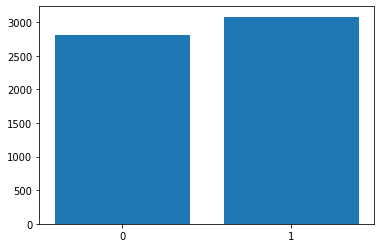

In [24]:
#Visualising the data
#Chceking the distribution of target variable to check if the data is imbalanced
#Cleaning the data and applying data processing and engineering techniques

#Storing the value counts for target variable

crater_count = y.value_counts()
print(crater_count)


#Plotting bar plot
plt.bar(crater_count.index, crater_count, tick_label = [1,0])
plt.show()

# Standardize the data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [25]:
#Model Building
#Splitting the data into traion and test
#Predicting the values of attr1089 after building a Machine learning model
#Trying to improve roc_anb_auc score

# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

# Initialize the logistic regression
lr = LogisticRegression()

# Fit the model 
lr.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = lr.predict(X_test)

# roc score
roc_score = roc_auc_score(y_pred,y_test)
print(roc_score*100)



81.18598822215637


In [26]:
#Trying to improve models performance with Decision Tree algorith

# Initialize decision tree
dt = DecisionTreeClassifier(random_state=4)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred = dt.predict(X_test)

# ROC score
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.863399710814684


In [27]:
#Trying to improve models performance with Decision Tree algorithm

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(random_state=4)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.8965213084929904


In [28]:
# Bagginng or Bootstrap aggregation

# Initialize Bagging Classifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),random_state=0,n_estimators=100,max_samples=100)

# Fit the model on training data
bagging_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred = bagging_clf.predict(X_test)

# accuracy 
print(bagging_clf.score(X_test,y_test))

# roc_score
score_bagging = roc_auc_score(y_test,y_pred)
print(score_bagging)

0.8252262443438914
0.822202991669564


In [29]:
# Voting Classifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Code starts here
# Initialize voting classifier
voting_clf_hard = VotingClassifier(estimators=model_list,voting='hard')

# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)

# accuracy
hard_voting_score = voting_clf_hard.score(X_test,y_test)
print(hard_voting_score*100)

89.47963800904978


In [36]:
#Prediction on test data and creating sample submission file

#Loading the test data and store the Id column in a separate variable.
#Performing the same operations on the test data that you have performed on the train data.
#Creating the submission file as a csv file consisting of the Id column from the test data.

# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv("C:/Users/hp/Python Projects/Projects/Project_Ensemble_Techniques_Mars_Crater_Classification/test.csv")
test.head(10)

,Id,Unnamed: 0,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr1079,attr1080,attr1081,attr1082,attr1083,attr1084,attr1085,attr1086,attr1087,attr1088
0,3531,3531,-4.492422,-6.629738,-7.919406,4.508779,-2.831982,-4.172664,15.308077,9.871601,...,17.920403,22.535800,28.566427,29.766900,29.245158,31.312288,30.214145,19.960902,16.394512,20.275859
1,3916,3916,41.931532,-7.567764,-15.296777,-0.700684,-2.476057,-2.370331,23.990248,36.879395,...,34.749268,82.050315,80.836724,84.742486,76.576226,92.660668,78.585458,73.230589,50.373267,68.214557
2,3065,3065,-41.649680,-53.923069,-52.578029,-28.343204,37.459261,80.567602,20.427972,-30.090580,...,67.991943,84.918449,84.841743,68.827976,52.592990,61.269953,62.074993,68.300953,78.849034,56.474570
3,3465,3465,-0.791667,-4.694444,-1.611111,-2.680556,-11.472222,-0.708333,6.291667,-2.777778,...,18.708333,16.864583,19.843750,18.645833,17.072917,12.330247,14.212963,15.878086,23.089506,16.007813
4,5619,5619,6.959300,16.215000,1.975700,-15.563000,-15.645000,12.499000,4.997900,24.216000,...,100.310000,84.628000,84.861000,101.450000,105.720000,122.930000,111.640000,103.260000,104.480000,121.950000
5,4318,4318,-45.121401,6.760757,-5.019719,7.826084,4.932963,19.244558,28.831726,32.107408,...,32.189399,47.414964,49.882446,67.421156,71.527751,117.109069,96.135930,36.824821,27.670715,70.703763
6,770,770,0.368223,-12.761748,4.319631,7.095191,-1.356393,4.893217,9.127679,-1.911823,...,26.363580,48.766537,41.421956,36.029100,30.776394,34.985568,28.108755,29.707090,39.796100,31.396789
7,4913,4913,5.109453,-9.548926,-0.354173,10.440500,4.815803,-5.015999,-11.231416,-1.502380,...,37.134155,30.085740,23.827494,20.806044,21.122301,22.239820,28.338269,42.401279,33.041516,33.707645
8,6923,6923,-2.822100,-6.481600,2.199600,1.667800,4.210800,8.521600,7.972600,-2.264100,...,53.229000,40.059000,52.609000,66.837000,61.843000,55.051000,49.918000,44.867000,43.066000,45.824000
9,221,221,0.713040,-9.988064,-7.501158,-1.218472,8.477437,34.027117,36.431403,17.794000,...,86.008464,75.114473,68.383436,90.553521,102.499729,111.707208,94.489205,90.885553,93.610843,102.863143


In [37]:
# Storing the id from the test file
id_ = test['Id']

# Apply the transformations on test
test = test.drop(columns=['Id', 'Unnamed: 0'])
test = scaler.transform(test)

# Predict on the test data
y_pred_test = rfc.predict(test)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'attr1089':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_test.csv',index=False)

# Code ends here

In [38]:
sample_submission

,Id,attr1089
0,3531,0
1,3916,0
2,3065,1
3,3465,1
4,5619,0
5,4318,0
6,770,1
7,4913,1
8,6923,0
9,221,0
